Regression Dataset: Medical Cost Personal Dataset

In [2]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./datasets/old/insurance.csv')

In [3]:
# 2. Show the dataset [to have an overview of the data structure]
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
dataset.shape

(1338, 7)

In [5]:
# 5. Identify and handle missing values using imputation or removal techniques
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# 5.2 if there is/are missing data or values then proceed with this next method. If none, then skip this process
# dataset.fillna(dataset.mean())

In [7]:

# 5.1. If you have missing data, then proceed with this next step.
# To fill in missing data, we need first to convert string values to numerical values. 
# To do that, run this code

# dataset = {"product": ["aaa", "bbb"], "product": ["0", "1"]}

# df = pd.DataFrame(dataset)
# df["product"] = df["product"].astype(int)

# print(df)
# print(df.dtypes)

In [8]:
# 3. Generate descriptive statistics for the data
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# 4. Check the data types of each column, number of non-null values, and memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# convert string data to numerical values
# sex | smoker| region

dataset['smoker'].unique() # female = 0 | male = 1
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})

In [11]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [12]:
dataset['sex'] = dataset['sex'].map({'male': 1, 'female': 0})

In [13]:
dataset['region'] = dataset['region'].map({'southwest': 1, 'southeast': 2,
                                           'northwest': 3, 'northeast': 4})

In [14]:
X = dataset.drop(['charges'], axis=1)

In [15]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [16]:
y = dataset['charges']

In [17]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_test, X_train, y_test, y_train =  train_test_split(X, y, test_size=0.2, random_state=50)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

# create a dataframe to show the performance of 4 models
df = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred1, 'SVM': y_pred2, 'Random Forest': y_pred3,
                  'Gradient Boosting': y_pred4})

In [23]:
df

,Actual,Linear Regression,SVM,Random Forest,Gradient Boosting
1048,3594.17085,2233.473915,9778.810883,4016.367036,3240.065665
45,20630.28351,13492.437637,9828.823952,13319.899468,13163.290863
201,8871.15170,11268.939196,9817.060821,10143.405268,9316.037988
153,19964.74630,32449.853239,9804.616684,21035.608990,20946.013534
1251,1241.56500,-2751.450291,9774.355238,1622.044918,877.737965
...,...,...,...,...,...
229,9225.25640,10612.006909,9813.879833,10102.575228,12019.221141
70,16577.77950,27200.073968,9781.109041,18228.991200,19086.915375
132,11163.56800,13750.058295,9825.787394,14929.500546,13606.448936
1313,36397.57600,28967.673589,9775.128256,37693.238360,39770.378559


In [24]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

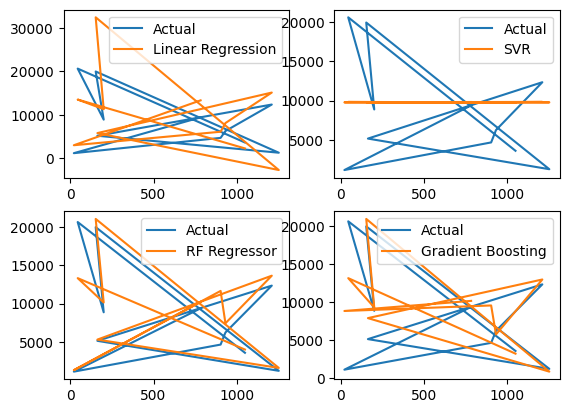

In [25]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df['Linear Regression'].iloc[0:11], label = 'Linear Regression')
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df['SVM'].iloc[0:11], label = 'SVR')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df['Random Forest'].iloc[0:11], label = 'RF Regressor')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df['Gradient Boosting'].iloc[0:11], label = 'Gradient Boosting')
plt.legend()

plt.tight_layout

In [26]:
# evaluating the algo using R2
# greater the value of R2 = better value
from sklearn import metrics

In [27]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [28]:
print(score1, score2, score3, score4)

0.7308122651516431 -0.07455793359126894 0.8329549657054871 0.832588706800792


In [29]:
mae1 = metrics.mean_absolute_error(y_test, y_pred1)
mae2 = metrics.mean_absolute_error(y_test, y_pred2)
mae3 = metrics.mean_absolute_error(y_test, y_pred3)
mae4 = metrics.mean_absolute_error(y_test, y_pred4)

In [30]:
print(mae1, mae2, mae3, mae4)

4386.258964248289 8232.024353736966 2696.092537417664 2798.8833674325147


In [31]:
gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [32]:
import pickle

In [33]:
with open('C:/xampp/htdocs/itd105_ml_algo/itd105_app/MLmodels/med_model.pkl', 'wb') as file:
    pickle.dump(gr, file)


In [34]:
correlation = dataset.corr()

<Axes: >

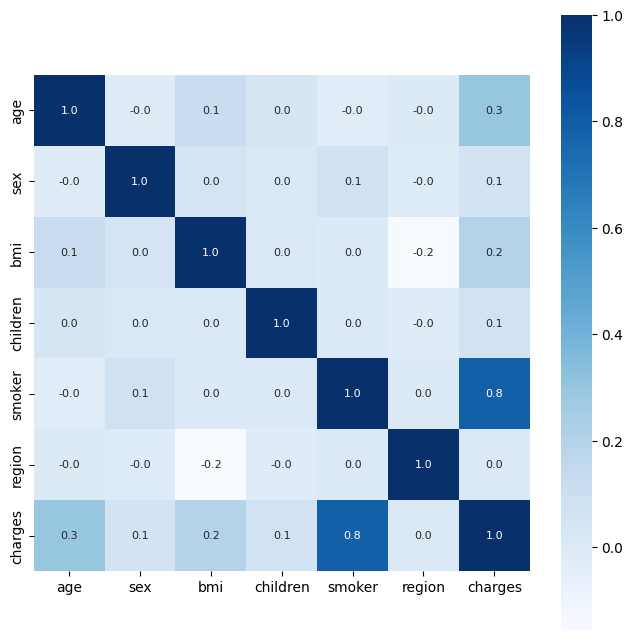

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Figure size 1200x1200 with 0 Axes>

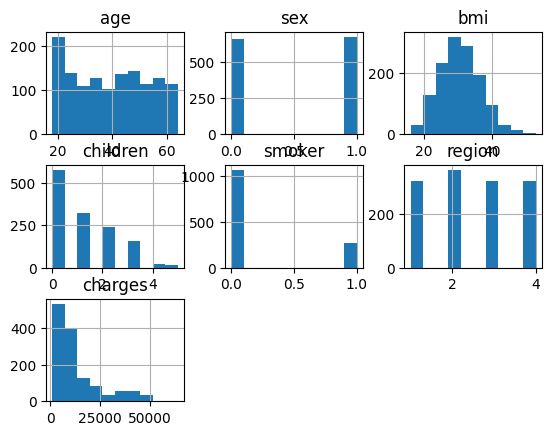

In [42]:
# 6. Next, create a visualizations to observe and explore the data distribution
# There are two types of data visualization: Univariate and Multivariate plots
# UNIVARIATE PLOT: focus on a single variable or feature at a time. They are used 
# to visualize the distribution and characteristics of individual variables in isolation.

plt.figure(figsize=(12,12))
dataset.hist()
plt.show()

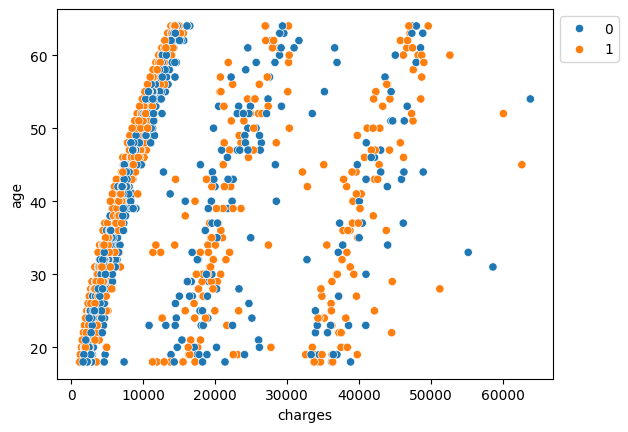

In [43]:
# 6. Next, create a visualizations to observe and explore the data distribution
# There are two types of data visualization: Univariate and Multivariate plots
# MULTIVARIATE PLOT: involve the simultaneous visualization of two or more variables 
# to explore relationships, correlations, and patterns among them.

sns.scatterplot(x='charges', y='age',
                hue='sex', data=dataset, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

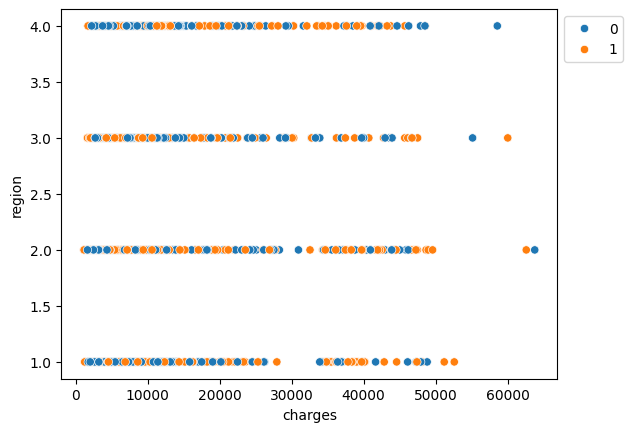

In [46]:
# 6. Next, create a visualizations to observe and explore the data distribution
# There are two types of data visualization: Univariate and Multivariate plots
# MULTIVARIATE PLOT: involve the simultaneous visualization of two or more variables 
# to explore relationships, correlations, and patterns among them.

sns.scatterplot(x='charges', y='region',
                hue='sex', data=dataset, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [40]:
# 7. Identifying and handling outliers (if needed)
# 8. Summary and Insights

# This dataset depicts the various medical health insurance costs of random US residents. As observed, 
# there are seven (7) features present in the dataset to be used as an analysis on evaluating the personal medical costs of random US citizens:
    
# a. age -> presents the primary age beneficiary;
# b. sex -> for the insurance contractor gender;
# c. BMI -> illustrating respondents' body mass index;
# d. children -> number of children covered by health insurance;
# e. smoker -> if he/she is a smoker;
# f. region -> where the beneficiary lives;
# g. charges -> medical costs billed by health insurance

# As observed above, I compared three [age, children, region] features to the charges feature. 
# With this, I can be able to analyze how much health insurance a US citizen [male or female] costs using their age, children, and the region 
# they reside as the basis for my assessment.

# [x = age | y = charges ] -> It is depicted that most females in their mid-50s would cost 60K plus in their health insurance compared to males 
# in their mid-30s which would bill just around 50K plus.

# [x = children | y = charges] -> It is clearly shown that it would be a big advantage if you have kids or dependents. It is because the more 
# you have dependent, the lesser your medical costs will be. As observed in the graph, those citizens who have no kids on their own would pay 
# around 60k plus compared to those who have five (5) children who only pay around 20k plus.

# [x = region | y = charges] -> There are four (4) regions present in the dataset: southeast, northeast, northwest, and southwest. 
# As shown in the graph, the southeast region is the highest region that pays 60K plus health insurance, next is the northwest region which pays 60K, 
# then the northeast region which pays mostly 60K, and lastly, the southwest region which pays 50K plus health insurance.